In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss

In [128]:
df = pd.read_csv('gbm-data.csv')
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [129]:
X = df.drop(columns= ['Activity'])
y = df['Activity']
X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,...,0,0,0,0,0,0,0,0,0,0
3747,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,...,0,0,1,0,1,0,1,0,0,0
3748,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,...,0,0,0,0,0,0,0,0,0,0
3749,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.372936,...,0,0,0,0,0,0,0,0,0,0


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)
X_train

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
776,0.066700,0.502087,0.00,0.00,0.139318,0.599945,0.379030,0.585445,0.685130,0.372628,...,0,0,0,0,0,0,0,0,0,0
3421,0.033300,0.445227,0.00,0.00,0.359760,0.752562,0.234042,0.504428,0.850419,0.145420,...,0,0,0,0,0,0,0,0,0,0
2663,0.066700,0.594110,0.05,0.00,0.132102,0.645920,0.331572,0.511633,0.760417,0.334651,...,0,0,0,0,0,0,0,0,0,0
2749,0.133333,0.584564,0.00,0.00,0.097500,0.771798,0.258248,0.523845,0.755389,0.281245,...,0,0,0,0,0,0,0,0,0,0
2098,0.233333,0.584210,0.00,0.00,0.115112,0.747568,0.278127,0.485389,0.808548,0.270879,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.333333,0.766687,0.20,0.25,0.632009,0.746963,0.144060,0.272527,0.758233,0.190532,...,0,0,0,0,0,0,0,0,0,0
247,0.166667,0.763886,0.20,0.00,0.230280,0.655970,0.246831,0.410323,0.653347,0.316919,...,0,0,0,0,0,0,0,0,0,0
1626,0.000000,0.358867,0.00,0.00,0.226451,0.791364,0.261548,0.216087,0.888404,0.186727,...,0,0,0,0,0,0,0,0,0,0
1310,0.066700,0.482396,0.00,0.00,0.128419,0.644999,0.332034,0.537411,0.735518,0.327996,...,0,0,0,0,0,0,0,0,0,0


In [131]:
def find_loss(clf, X, y):
    loss = np.empty(clf.n_estimators_)
    for i, y_decision in enumerate(clf.staged_decision_function(X)):
        y_pred = 1.0/(1.0 + np.exp(-y_decision))
        loss[i] = log_loss(y, y_pred)
    return loss

      Iter       Train Loss   Remaining Time 
         1           1.0190           10.34s
         2           0.9192            9.38s
         3           0.8272            8.78s
         4           0.7834            8.37s
         5           0.7109            8.11s
         6           0.6368            7.97s
         7           0.5797            8.09s
         8           0.5610            8.03s
         9           0.5185            7.95s
        10           0.4984            7.91s
        20           0.1999            7.43s
        30           0.1313            6.94s
        40           0.0790            6.68s
        50           0.0511            6.31s
        60           0.0352            5.91s
        70           0.0245            5.57s
        80           0.0162            5.24s
        90           0.0114            4.91s
       100           0.0077            4.63s
       200           0.0002            1.49s


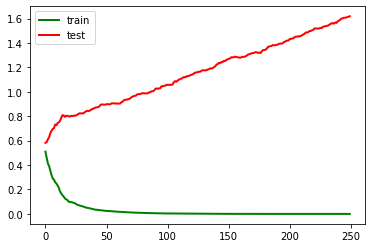

      Iter       Train Loss   Remaining Time 
         1           1.1255            9.03s
         2           1.0035            8.42s
         3           0.9386            7.98s
         4           0.8844            7.73s
         5           0.8381            7.57s
         6           0.7995            7.43s
         7           0.7559            7.47s
         8           0.7205            7.55s
         9           0.6958            7.48s
        10           0.6725            7.39s
        20           0.4672            6.94s
        30           0.3179            6.58s
        40           0.2274            6.25s
        50           0.1774            6.00s
        60           0.1394            5.76s
        70           0.1050            5.46s
        80           0.0805            5.18s
        90           0.0650            4.86s
       100           0.0511            4.58s
       200           0.0058            1.50s


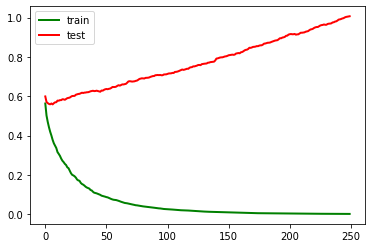

      Iter       Train Loss   Remaining Time 
         1           1.2095            9.51s
         2           1.1006            8.78s
         3           1.0240            8.28s
         4           0.9729            8.01s
         5           0.9387            8.01s
         6           0.8948            7.98s
         7           0.8621            8.08s
         8           0.8360            8.02s
         9           0.8171            7.92s
        10           0.7883            7.83s
        20           0.6029            7.15s
        30           0.4760            6.73s
        40           0.3879            6.37s
        50           0.3325            6.02s
        60           0.2759            5.80s
        70           0.2304            5.54s
        80           0.1969            5.22s
        90           0.1718            4.89s
       100           0.1404            4.59s
       200           0.0358            1.56s


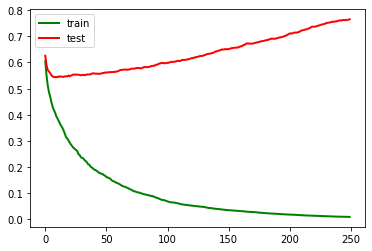

      Iter       Train Loss   Remaining Time 
         1           1.2613            9.12s
         2           1.1715            8.47s
         3           1.1009            8.00s
         4           1.0529            7.98s
         5           1.0130            7.81s
         6           0.9740            7.65s
         7           0.9475            7.57s
         8           0.9197            7.55s
         9           0.8979            7.46s
        10           0.8730            7.39s
        20           0.7207            6.97s
        30           0.6055            6.62s
        40           0.5244            6.28s
        50           0.4501            5.96s
        60           0.3908            5.66s
        70           0.3372            5.36s
        80           0.3009            5.09s
        90           0.2603            4.82s
       100           0.2327            4.50s
       200           0.0835            1.48s


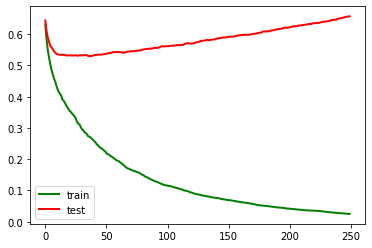

      Iter       Train Loss   Remaining Time 
         1           1.3199            8.15s
         2           1.2645            7.70s
         3           1.2170            7.46s
         4           1.1775            7.36s
         5           1.1404            7.28s
         6           1.1106            7.22s
         7           1.0844            7.20s
         8           1.0617            7.25s
         9           1.0411            7.29s
        10           1.0223            7.31s
        20           0.8864            6.83s
        30           0.7844            6.51s
        40           0.7176            6.19s
        50           0.6590            5.92s
        60           0.6120            5.67s
        70           0.5599            5.50s
        80           0.5242            5.16s
        90           0.4829            4.84s
       100           0.4473            4.53s
       200           0.2379            1.48s


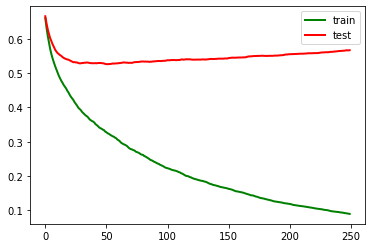

In [132]:
best_n_est = {}
best_quality = {}
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    N_EST = 250
    gbc = GradientBoostingClassifier(n_estimators=N_EST, learning_rate=lr, verbose=True, random_state=241)
    gbc.fit(X_train, y_train)
    train_loss = find_loss(gbc, X_train, y_train)
    test_loss = find_loss(gbc, X_test, y_test)
    best_n_est[lr], best_quality[lr] = test_loss.argmin() + 1, test_loss.min()
    plt.figure()
    plt.plot(train_loss, 'g', linewidth=2)
    plt.plot(test_loss, 'r', linewidth=2)
    plt.legend(['train', 'test'])
    plt.show()
        

In [133]:
best_n_est

{1: 1, 0.5: 7, 0.3: 11, 0.2: 37, 0.1: 52}

In [134]:
best_quality

{1: 0.5822942594278475,
 0.5: 0.5584259973942154,
 0.3: 0.5432835808866866,
 0.2: 0.5301645204906471,
 0.1: 0.5259049090698129}

In [135]:
out = open('q1.txt', 'w')
out.write('overfitting')
out.close()

In [136]:
out = open('q2.txt', 'w')
out.write(str(best_quality[0.2]) + ' ' + str(best_n_est[0.2]))
out.close()

In [137]:
rfc = RandomForestClassifier(n_estimators=best_n_est[0.2], random_state=241)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=37, random_state=241)

In [139]:
y_pred = rfc.predict_proba(X_test)
ls = log_loss(y_test, y_pred)
ls

0.5410941951182815

In [140]:
out = open('q3.txt', 'w')
out.write(str(ls))
out.close()